In [18]:
#决策树的预剪枝：在构建决策树的过程中，提前停止（比如指定决策树的深度；指定每个叶节点的样本个数）
#决策树的后剪枝是按照损失函数而定。损失函数为：（叶节点的熵 * 叶节点的样本数）* （叶节点的个数）比较来计算的
#随机森林，随机主要体现在数据选择的随机性（有放回的随机选择一定比例的测试数据），特征选择的随机性（无放回的选择一定比例的特征）

# from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [15]:
iris_data = pd.read_csv("iris.csv")
iris_data.columns = ["sepal_length_cm"," sepal_width_cm","petal_length_cm","petal_width_cm","class"] 
print(iris_data.head())

   sepal_length_cm   sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1              3.5              1.4             0.2   
1              4.9              3.0              1.4             0.2   
2              4.7              3.2              1.3             0.2   
3              4.6              3.1              1.5             0.2   
4              5.0              3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


In [19]:
iris_data.describe()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


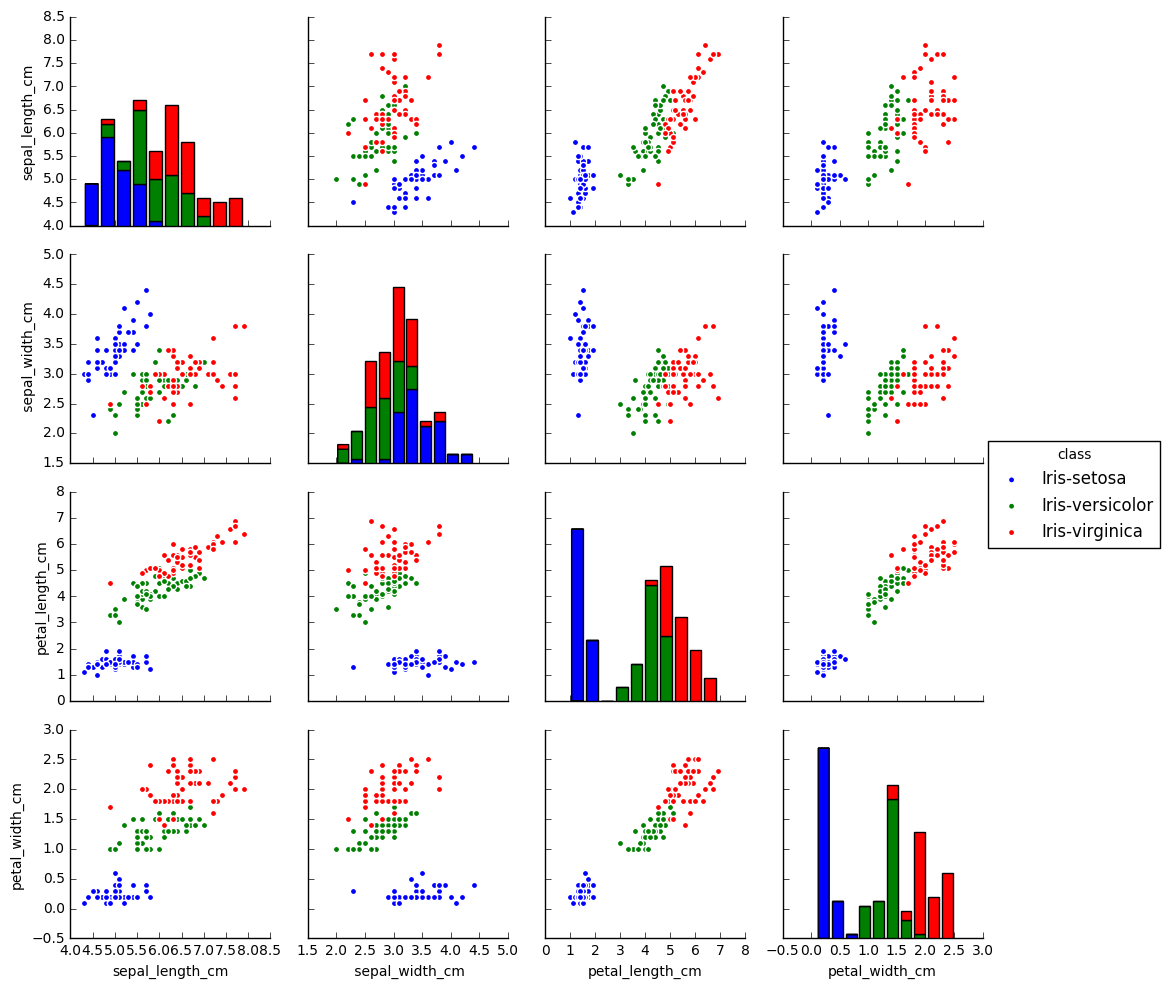

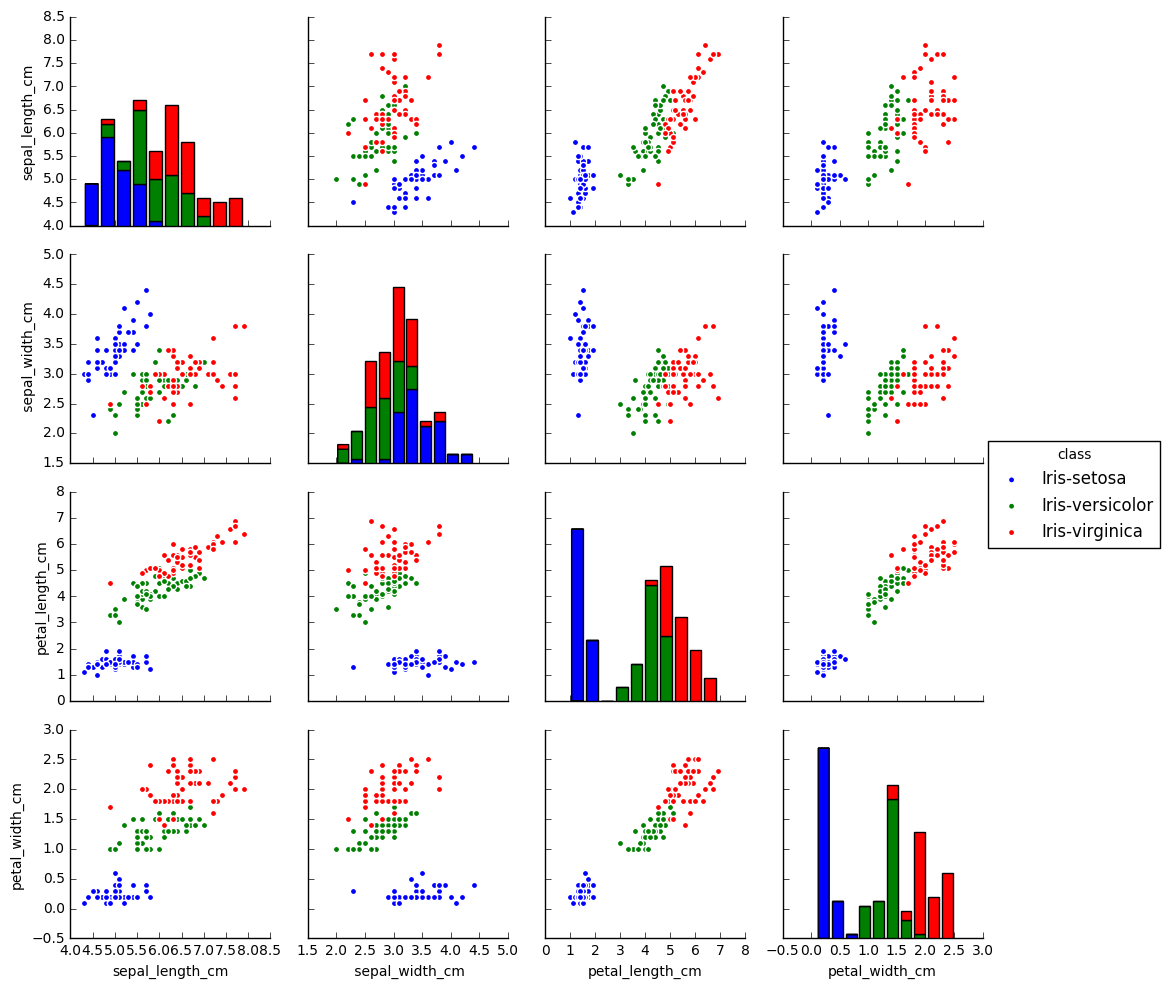

In [23]:
sb.pairplot(iris_data.dropna(),hue="class")#表述特征之间的关系，但是不能有缺失值，所以先用dropna将缺失值去掉
plt.show()

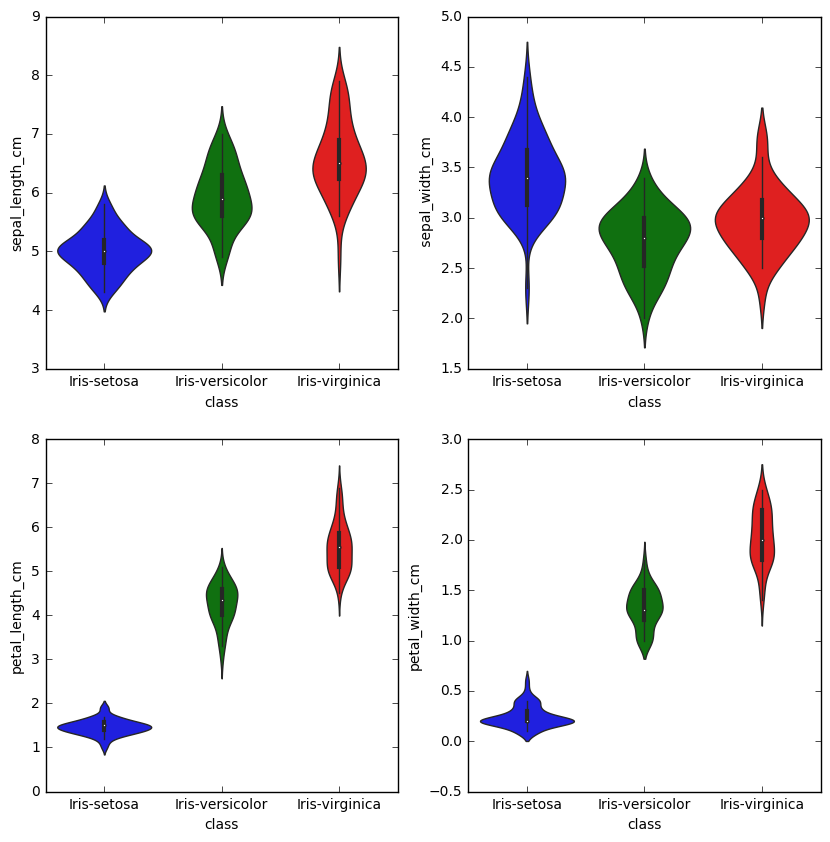

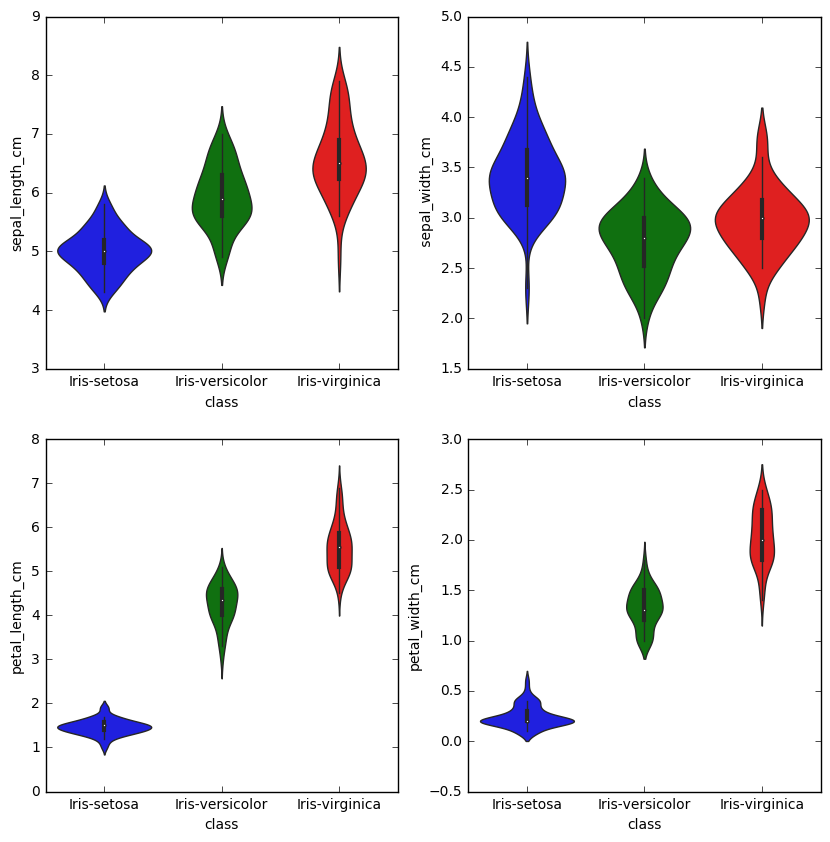

In [25]:
plt.figure(figsize=(10,10))
for column_index,column in enumerate(iris_data.columns):
    if column == "class":
        continue
    plt.subplot(2,2,column_index + 1)
    sb.violinplot(x="class",y=column,data=iris_data)
plt.show() 

In [26]:
from sklearn.cross_validation import train_test_split
all_inputs = iris_data[["sepal_length_cm"," sepal_width_cm","petal_length_cm","petal_width_cm"]].values
all_classes = iris_data["class"].values
train_inputs,test_input,train_classes,test_classes = train_test_split(all_inputs,
                            all_classes,train_size=0.75,random_state=1)
#random_state保证重复试验的时候，得到一组一样的随机数，填0或者不填，得到的训练集和测试集每次都不一样


In [27]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
DT_clf.fit(train_inputs,train_classes)
score = DT_clf.score(test_input,test_classes)
print(score)



0.9736842105263158
